# Iris Flower Classification

### Reading Data

First: Import the pandas library to read the file, to see the file, use .head() method for first rows of the dataframe, cause maybe your data will be soo much large, so it's a good practice to print just 5 rows instead of all dataframe

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Cleaning Data

For the cleaning of data, there are many techinques, everyone use the algos to do so!!
The Best Data Cleaning Techniques for Preparing Your Data
- 1 Remove unnecessary values
- 2 Remove duplicate data.
- 3 Convert data types.
- 4 Search for missing values.
- 5 Use a clear format.
- 6 Remove unwanted outliers.

- 1 Removing Unnecessary Values: Unnecessary values is just making the size of data, it effects nothings or affect less on the data, we usually remove unnecessary features form the dataframe, because it make the high accuracy of the model. *but luckily here we don't have any unnecessary values or features!*

- 2 Removing Duplicates: Duplicates also just make the data size big, so we remove them, well, if we have very less data, and we want to train a model, it'll give us very bad accuracy, so there, we make duplicates to we can get good accuracy because as model requires a large data for training the model.

In [3]:
#checking the duplicates
data.duplicated().sum()

3

In [4]:
#removing the duplicates
data.drop_duplicates(keep = False, inplace = True)
#confirming, if the duplicates are removed succussfully
data.duplicated().sum()

0

- 3 Convert data types: We have to convert the data types of the values to their defaults, e.g we have a column of Age, where the values are in '2,3,4,5', it's int by default, but if it's str, then there's a problem, in future we might have to process the Age column, but it'll show us error as we can't process on str!(math functions)
- That's why, convert the data type to their defaults!

In [5]:
#checking datatypes
data.dtypes  #Everything is good!!

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- 4 Search for missing values: In the data, there might be possible, we're missing some values, like someone forget to put his/her Age, and in the database, it's empty
- To get better accuracy, and make our model to fit properly, we have to replace the missing values with their relevent ones, e.g if we're missing the Age, we can replace the Age with the most common value (which is present in many datasets) etc.

In [6]:
#checking the NAN (not a number)
data.isna().sum()   # all good

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#checking the NUll 
data.isnull().sum()   #all good

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- 5 Use a clear format: We have to make the one format in all the data so we can get the good accuracy
- from one format i mean, just suppose we're asked to fill a box, in which we have to insert out Age, suppose the age is 12, some will type like 12 years, some will like 12.4, some will like 12 years 4 months, 
- so there's many format for just a single thing, we have to set one format, it's also a part of cleaning the data. 
- *but luckily here, we don't have any*

- 6 Remove unwanted outliers: Outliers means that out dataset vary from others, it can be very large or very small, it effects the statistical analysis, Machine Learing Models, and many more.
    that's why we remove the outliers, it also helps us for getting the good accuracy of the ML model!

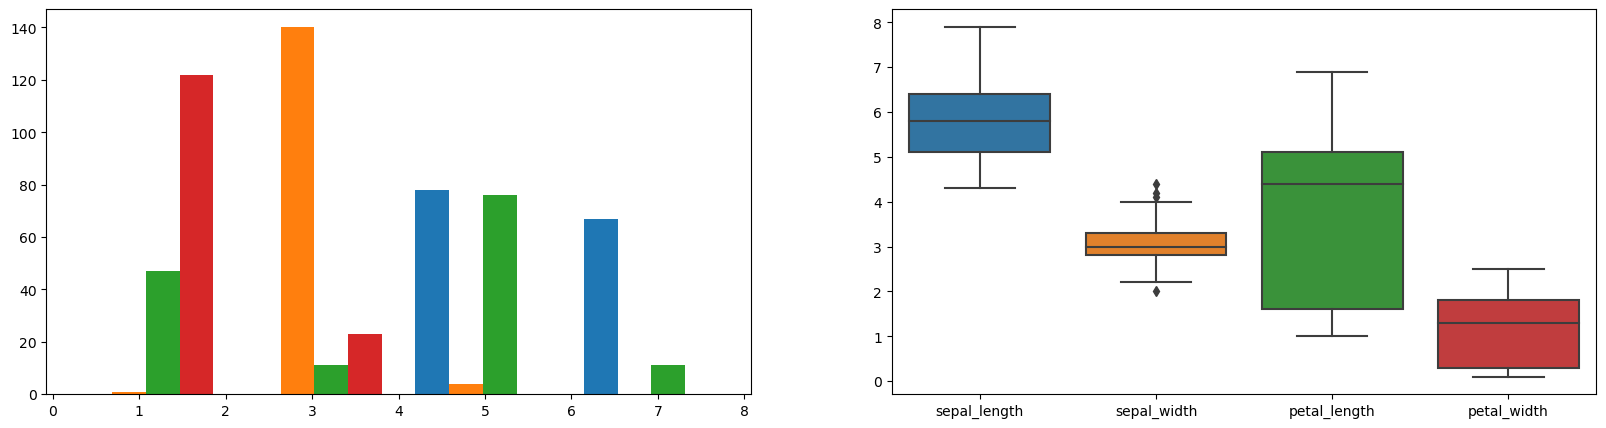

In [8]:
#Checking the outliers with visulizations
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].hist(data.drop('species', axis = 1), bins=4)
sns.boxplot(data, ax=ax[1])
plt.show()  #we see  that there's an outlier in the column "sepal_width"

### Splitting Data

- Now we'll split the data into labels (features) and target, it'll help us to train the model in features so it can predict the target easily

In [9]:
x = data.drop('species', axis = 1)  #features
y = data['species']   #target
x.shape, y.shape

((145, 4), (145,))

- This code will remove the outliers, that will help the model to predict easy with more accuracy

In [10]:
#Normalizing the data, (free from outliers)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_columns = x.select_dtypes(include=['float64', 'int64']).columns  #this line is restricting the data that
#it must be int and float, not the str will be allowed in standard scaler

normalizing = ColumnTransformer([
    ('Normalizing', StandardScaler(), numeric_columns)
], remainder = 'passthrough')

- Now, we already Normalized the data, we'll split the data in traing set and the testing set, we'll train the model on training set and then predict it's accuracy on test set

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((101, 4), (44, 4), (101,), (44,))

- we're gonna use the KNN model, you can use with your mindset, but you have to look what kind of problem we're facing, use the model according to it

### Importing Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

- As everything is set now, we'll make the Pipeline, as Pileline has a lot more beneficial to us, it'll help us to write the productive code, with no headache of reverse method as we did in during the training of model! Pipeline do that all by itself! Thanks to Pipeline😙

In [13]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('normalizing', normalizing),
    ('model', model)
])
pipe

Pipeline(steps=[('normalizing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Normalizing',
                                                  StandardScaler(),
                                                  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [14]:
#fit the data in the pipeline
pipe.fit(x_train, y_train)

Pipeline(steps=[('normalizing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Normalizing',
                                                  StandardScaler(),
                                                  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object'))])),
                ('model', KNeighborsClassifier())])

## Predictions

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_predict = pipe.predict(x_test)
y_predict

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [16]:
pipe.score(x_test, y_test)

0.9318181818181818

- Classification Report provides us a large amount of informantion, For each class in a classification difficulty, scikit-learn gives an extensive overview of classification performance indicators. It covers measurements like support, recall, precision, and F1-score.

In [17]:
report = classification_report(y_test, y_predict)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.73      0.84        11
 Iris-virginica       0.86      1.00      0.92        18

       accuracy                           0.93        44
      macro avg       0.95      0.91      0.92        44
   weighted avg       0.94      0.93      0.93        44



In [18]:
#accuracy score
print(accuracy_score(y_predict, y_test))

0.9318181818181818


### Confucion Matrix with heatmap

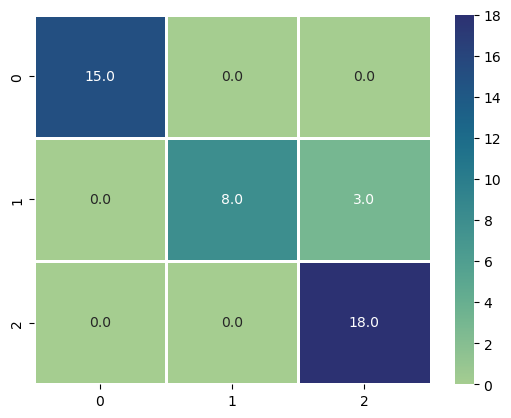

In [19]:
import seaborn as sns
conmat = confusion_matrix(y_test, y_predict)

sns.heatmap(conmat, annot=True, fmt=".1f", linewidth=1, cmap="crest");

### Exporting the Model

- we're here saving the file using the pickle, so we can use it in Production side, but we just saved it so we can see the deployment
- is the model is properlly trained or not
- so let's see!!

In [20]:
import pickle
pickle.dump(pipe,open("Task-1 (Iris Deployment).pkl", 'wb'))

# Let's go the the Deployment side, so see the Prediction in real time!😉